# 学習データ
- 課題が演習時間内に終わった回数
- 課題の提出回数の平均
- 各課題の点数の平均
- 教科書クイズの提出回数の平均
- 中間テストの点数

# 検証データ
- 期末テストの点数

In [18]:
# データ分析ライブラリ
import pandas as pd
# 計算で使うNumPy
import numpy as np
# 可視化ライブラリ
import matplotlib.pyplot as plt
#Jupyter notebook用
%matplotlib inline

In [19]:
df = pd.read_csv('saisinnbann_CDEFJKL1819_10.csv')
#useridのみ省く
df_1=df[["kad_perfectscore_pro","submitnum_kad_ave","score_kad_ave","submitnum_kyou_ave","midtermtest","finaltest"]]

In [20]:
#説明用
df[["userid","kad_perfectscore_pro","submitnum_kad_ave","score_kad_ave","submitnum_kyou_ave","midtermtest","finaltest"]].head(50)

,userid,kad_perfectscore_pro,submitnum_kad_ave,score_kad_ave,submitnum_kyou_ave,midtermtest,finaltest
0,182233,0.18,3.62,2.87,1.00,24,34
1,182324,0.86,2.23,8.56,1.64,52,88
2,182669,0.86,3.20,7.60,1.55,59,55
3,182771,0.59,4.33,6.35,1.45,42,44
4,182787,0.55,2.40,5.04,1.80,46,54
5,183117,1.00,3.00,8.80,1.82,67,92
6,183119,0.95,2.23,8.40,2.09,84,81
7,183120,0.95,3.45,8.72,2.64,72,83
8,183123,1.00,3.18,8.80,1.82,81,88
9,183125,0.95,3.32,8.40,2.36,61,73


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import linear_model
import sklearn

In [22]:
#説明変数
X = df_1[["kad_perfectscore_pro","submitnum_kad_ave","score_kad_ave","submitnum_kyou_ave","midtermtest"]]
#説明変数（midtermtest無い）
#X_2 = df_1[["kad_perfectscore_count","submitnum_kad_ave","score_kad_ave","submitnum_kyou_ave"]]
#目的変数
Y = df_1["finaltest"]

In [23]:
#学習データ、検証データを8:2に分割
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2)

# パラメータサーチ

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
#midtermtestを含まないときは、X_train2Y_train2に変更
search_params = {
    'n_estimators'      : [10, 30, 50, 100, 300, 500, 1000, 10000],
    'max_features'      : [i for i in range(1,X_train.shape[1])],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 25, 50],
    'max_depth'         : [3, 5, 10, 25, 50]
}

gsr = GridSearchCV(
    RandomForestRegressor(),
    search_params,
    cv = 5,
    n_jobs = -1,
    verbose=True
)
 
gsr.fit(X_train, Y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 32.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [26]:
#最も精度の高いハイパーパラメータ
print(gsr.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)


# 寄与率（最も精度の高いハイパーパラメータで算出）

In [27]:
gsr.best_estimator_.score(X_test, Y_test)

0.3236010963689879

In [28]:
# 予測値を計算
y_train_pred = gsr.predict(X_train)
y_test_pred = gsr.predict(X_test)
#平均二乗誤差 (MSE, Mean Squared Error) とは、実際の値と予測値の絶対値の 2 乗を平均したもの
#この為、MAEに比べて大きな誤差が存在するケースで、大きな値を示す特徴があります。
#MAEと同じく、値が大きいほど誤差の多いモデルと言えます。
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(Y_train, y_train_pred), mean_squared_error(Y_test, y_test_pred)) )
#MSEの平方根 二乗平均平方根誤差 (RMSE: Root Mean Squared Error) 
#平均絶対誤差 (MAE, Mean Absolute Error) とは、実際の値と予測値の絶対値を平均したもの
#MAEが小さいほど誤差が少なく、予測モデルが正確に予測できていることを示す
#MAE が大きいほど実際の値と予測値に誤差が大きく、予測モデルが正確に予測できていないといえます。
from sklearn.metrics import mean_absolute_error
print('MSE train : %.3f, test : %.3f' % (np.sqrt(mean_absolute_error(Y_train, y_train_pred)), np.sqrt(mean_absolute_error(Y_test, y_test_pred))) )
# R^2(寄与率)の計算
#モデルの当てはまりの良さを示す指標で、最も当てはまりの良い場合、1.0となる
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(Y_train, y_train_pred), r2_score(Y_test, y_test_pred)) )

MSE train : 25.689, test : 165.464
MSE train : 1.982, test : 3.227
MSE train : 0.916, test : 0.324


# 説明変数の重要度

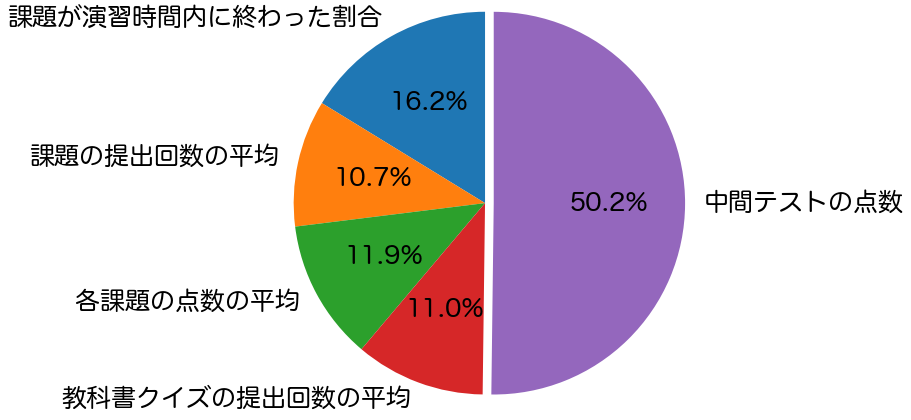

In [29]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
#日本語対応
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams["font.size"] = 25
# ラベルと値は反時計回りに指定します
labels_jp = ["課題が演習時間内に終わった割合","課題の提出回数の平均","各課題の点数の平均","教科書クイズの提出回数の平均","中間テストの点数"]
#説明変数の重要度
y_importances = gsr.best_estimator_.feature_importances_
# 円グラフからの飛び出し
ex = [0, 0, 0, 0, 0.1] 
# 円グラフを描く
plt.pie(y_importances, explode = ex, labels = labels_jp, autopct = '%1.1f%%', startangle = 90,radius=2.2) 
plt.show()

# 期末テストの予測数値

In [30]:
predict = gsr.best_estimator_.predict(X_test).round()
np.array(predict)
print(predict)

[83. 74. 83. 77. 84. 63. 87. 77. 62. 86. 56. 76. 79. 50. 84. 76. 62. 77.
 82. 70. 70. 55. 80. 56. 75. 57. 79. 68. 64. 54. 71. 52. 63. 67. 53. 65.
 70. 73. 77. 67. 83. 89. 62. 65. 89. 76. 79. 65. 79. 59. 64. 55. 89. 56.
 63. 78. 58. 66.]


# 期末テストの実際の数値

In [31]:
# ravel関数は、多次元のリストを1次元のリストにして返す
Y_test2=np.array(Y_test)
print(Y_test2.ravel())

[75 56 87 62 97 50 98 60 44 81 61 38 82 48 70 91 66 79 76 81 56 67 91 46
 76 66 92 67 68 50 38 67 52 62 37 63 64 65 88 55 91 72 42 77 73 82 69 61
 81 52 47 55 84 63 88 57 65 65]


# グラフ　予測値と実際の数値の差
- 横軸：データ数、縦軸：点数
- 一番左から一人目、予測数値（青）、実際の数値（オレンジ）


In [32]:
#予測数値int型で抽出
list_predict=predict.tolist()
#list_predict=list_predict[:10]
listint_predict=list(map(int, list_predict))
listint_predict

[83,
 74,
 83,
 77,
 84,
 63,
 87,
 77,
 62,
 86,
 56,
 76,
 79,
 50,
 84,
 76,
 62,
 77,
 82,
 70,
 70,
 55,
 80,
 56,
 75,
 57,
 79,
 68,
 64,
 54,
 71,
 52,
 63,
 67,
 53,
 65,
 70,
 73,
 77,
 67,
 83,
 89,
 62,
 65,
 89,
 76,
 79,
 65,
 79,
 59,
 64,
 55,
 89,
 56,
 63,
 78,
 58,
 66]

In [33]:
#実際の数値抽出
list_real=Y_test2.tolist()
#list_real=list_real[:10]
list_real

[75,
 56,
 87,
 62,
 97,
 50,
 98,
 60,
 44,
 81,
 61,
 38,
 82,
 48,
 70,
 91,
 66,
 79,
 76,
 81,
 56,
 67,
 91,
 46,
 76,
 66,
 92,
 67,
 68,
 50,
 38,
 67,
 52,
 62,
 37,
 63,
 64,
 65,
 88,
 55,
 91,
 72,
 42,
 77,
 73,
 82,
 69,
 61,
 81,
 52,
 47,
 55,
 84,
 63,
 88,
 57,
 65,
 65]

In [34]:
#小さい順にソート
matrix =[]
matrix.append(listint_predict)
matrix.append(list_real)
matrix_n=list(zip(*matrix))
sort_matrix_n=sorted(matrix_n)
listint_predict_sort=[]
list_real_sort=[]
for c in sort_matrix_n:
    listint_predict_sort.append(c[0])
    list_real_sort.append(c[1])

In [35]:
#list_realの要素の数の分だけlist型のlabelsに1から格納（x軸）
str_list = list(map(str, list_real_sort))
labels=[]
for i,j in enumerate(str_list):
    labels.append(i+1)
x = np.arange(len(labels))
#x=x[:10]
list_diff=np.array(listint_predict_sort) - np.array(list_real_sort)
list_diff2=np.abs(list_diff)
len([1 for x in list_diff2 if x<10])

28

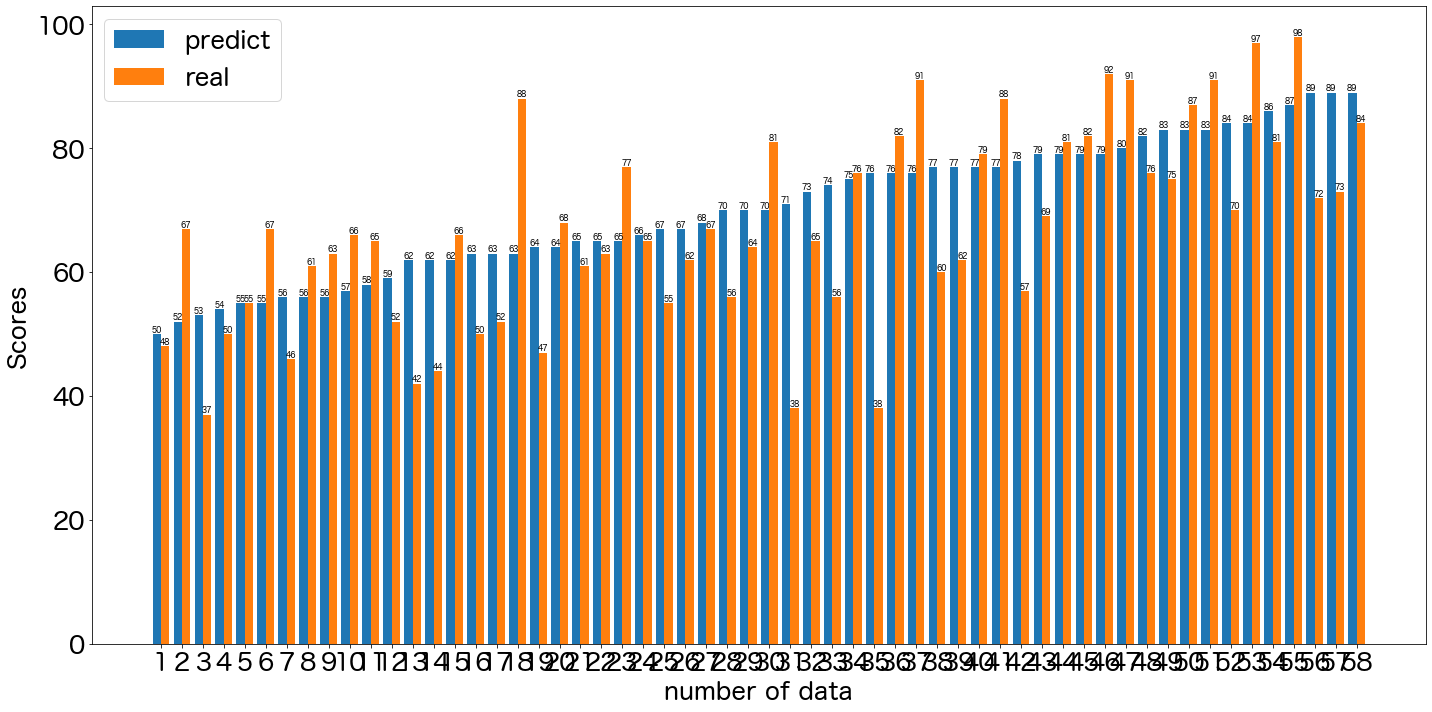

In [36]:
width = 0.4
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x - width/2, listint_predict_sort, width-0.8, label='predict')
ax.bar(x + width/2, list_real_sort, width-0.8, label='real')
# 棒グラフ内に数値を書く
for a, b in zip(x - width/2, listint_predict_sort):
    plt.text(a, b, b, ha='center', va='bottom',size=8)
# 棒グラフ内に数値を書く
for e, f in zip(x + width/2, list_real_sort):
    plt.text(e, f, f, ha='center', va='bottom',size=8)
    
ax.set_ylabel('Scores')
ax.set_title('')
ax.set_xlabel('number of data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams["font.size"] = 10

fig.tight_layout()
plt.show()

In [37]:
list_predict2=list_predict[:10]
listint_predict2=list(map(int, list_predict2))
list_real2=list_real[:10]
#小さい順にソート
matrix2 =[]
matrix2.append(listint_predict2)
matrix2.append(list_real2)
matrix_n2=list(zip(*matrix2))
sort_matrix_n2=sorted(matrix_n2)
listint_predict_sort2=[]
list_real_sort2=[]
for c2 in sort_matrix_n2:
    listint_predict_sort2.append(c2[0])
    list_real_sort2.append(c2[1])
#list_realの要素の数の分だけlist型のlabelsに1から格納（x軸）
str_list2 = list(map(str, list_real_sort2))
labels2=[]
for i2,j2 in enumerate(str_list2):
    labels2.append(i2+1)
x2 = np.arange(len(labels2))
x2=x2[:10]

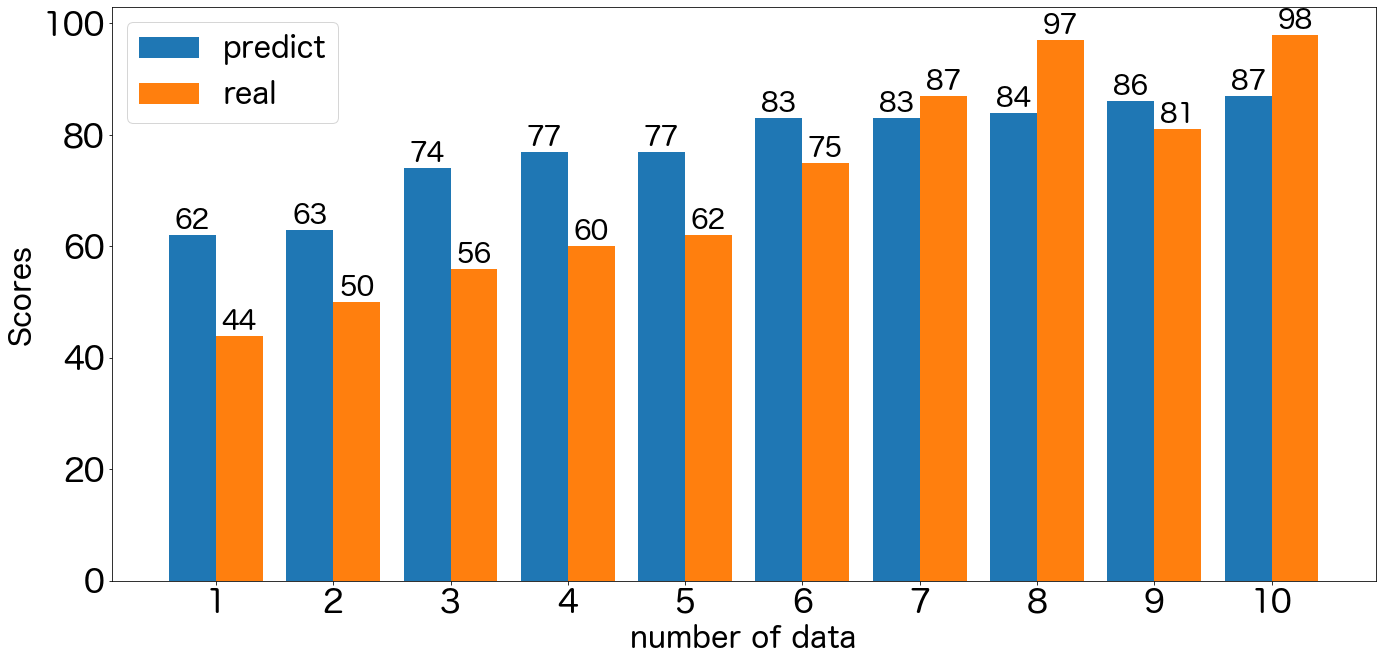

In [42]:
width = 0.4
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x2 - width/2, listint_predict_sort2, width, label='predict')
ax.bar(x2 + width/2, list_real_sort2, width, label='real')
# 棒グラフ内に数値を書く
for a2, b2 in zip(x2 - width/2, listint_predict_sort2):
    plt.text(a2, b2, b2, ha='center', va='bottom',size=27)
# 棒グラフ内に数値を書く
for e2, f2 in zip(x2 + width/2, list_real_sort2):
    plt.text(e2, f2, f2, ha='center', va='bottom',size=27)
    
ax.set_ylabel('Scores',fontsize=30)
ax.set_title('')
ax.set_xlabel('number of data',fontsize=30)
ax.set_xticks(x2)
ax.set_xticklabels(labels2)
ax.legend(fontsize=30)
plt.rcParams["font.size"] = 33

fig.tight_layout()
plt.show()

# 相関係数

In [39]:
#相関行列を作成
corr_matrix = df_1.corr()
corr_y = pd.DataFrame({"features":df_1.columns,"corr_y":corr_matrix["finaltest"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,corr_y
0,kad_perfectscore_pro,0.446754
1,submitnum_kad_ave,-0.033878
2,score_kad_ave,0.089222
3,submitnum_kyou_ave,-0.174132
4,midtermtest,0.667684
5,finaltest,1.000000


# 学習曲線 全てのファイルのpipe_lrを直すこと

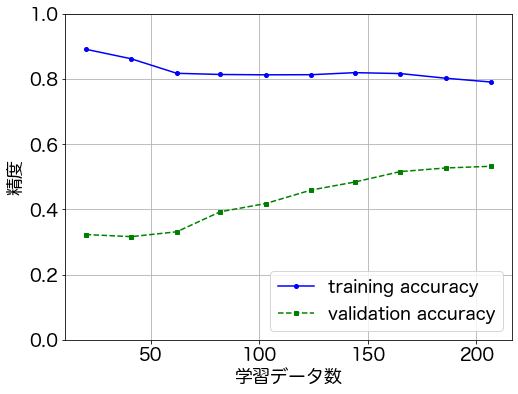

In [40]:
from sklearn.model_selection import learning_curve
from matplotlib import rcParams
#日本語対応
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams["font.size"] = 25
pipe_lr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)
##  cv => cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

##  https://matplotlib.org/gallery/recipes/fill_between_alpha.html
plt.figure(figsize=(8.0, 6.0))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=4, label='training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=4, label='validation accuracy')
plt.grid()
plt.tick_params(labelsize=18)
plt.xlabel('学習データ数',fontsize=18)
plt.ylabel('精度',fontsize=18)
plt.rcParams["font.size"] = 18
plt.legend(loc='lower right')
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.ylim([0, 1.0])
#plt.tight_layout()
plt.savefig('test2.png')
plt.show()

# これから
- 過学習を防ぐために、データ数を増やす
- 現状：教科書クイズや演習課題は、全てを学習データにしている
- 課題（取組中）：各回毎に精度を算出する（なるべく早い段階で期末テストの予測値を出すため）  
 　　　 　　　　　→どの回から、精度が一定になるか検証する

# 学会参加時のコメント
- 単位が取れるかどうかという判別だけなら，チートを外れ値として使えば，予測率が上がりそう
- チートしている学生同士は点数が似通うのでは？  
  
教員、学生向けについて  
教員向けなら、もう少し教員の直感を超えるものを作る必要あり  
学生向けなら、F C B A Sの評定を表示するのが良い？  
チーターの抽出  　
折れ線グラフの修正　誤差多い順
# 中間発表
仮説が立証したかどうか？

# 100回実行精度平均

In [24]:
score=[]
#精度算出100回実行　その平均
for d in range(100):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2)
    score.append(gsr.best_estimator_.score(X_test, Y_test))
new_list_ = [round(score[n], 2) for n in range(len(score))]
ave = sum(new_list_) / len(new_list_)
ave

0.7166999999999996

# 1000回実行時の精度　平均　ファイル指定

In [25]:
score2=[]
ave_list=[]
ndf = pd.read_csv('saisinnbann_CDEFJKL1819_10.csv')
#useridのみ省く
ndf_1=ndf[["kad_perfectscore_pro","submitnum_kad_ave","score_kad_ave","submitnum_kyou_ave","midtermtest","finaltest"]]
#説明変数
X2 = ndf_1[["kad_perfectscore_pro","submitnum_kad_ave","score_kad_ave","submitnum_kyou_ave","midtermtest"]]
#目的変数
Y2 = ndf_1["finaltest"]
for l in range(1000):
    #学習データ、検証データを8:2に分割
    X_train2, X_test2, Y_train2, Y_test2 = sklearn.model_selection.train_test_split(X2,Y2,test_size=0.2)
    score2.append(gsr.best_estimator_.score(X_test2, Y_test2))
    score2_round = [round(score2[m], 2) for m in range(len(score2))]
print(max(score2_round))
print(min(score2_round))
ave2 = sum(score2_round) / len(score2_round)
ave_list.append(ave2)
ave_list

0.84
0.36


[0.7017000000000008]

# 123,4,5,6,7,8,9,10授業日毎に精度を算出

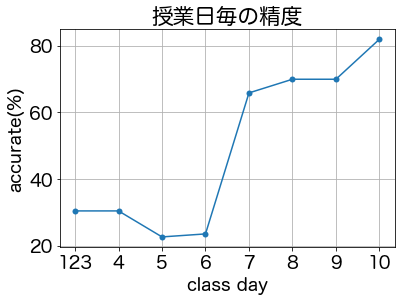

In [26]:
import numpy as np
import matplotlib.pyplot as plt
 
# 折れ線グラフを出力
left = np.array(["123","4","5","6","7","8","9","10"])
height = np.array([30.4, 30.4, 22.6, 23.5, 65.8,69.9,69.9,81.9])
plt.title("授業日毎の精度")
plt.xlabel("class day")
plt.ylabel("accurate(%)")
plt.grid(True)
plt.plot(left, height, marker="o", markeredgewidth=0)

123,4,5,6,7,8,9,10授業日毎に精度を算出  
課題7-1/2/3　コピペルナーを実行　csv出力  
正規化しようかな

仮説の再設定 
- 予習クイズの解答時間が長く、提出回数が多いと、演習課題の点数が高く、解答時間が短い  
- 演習課題の提出回数が1回の学生は、チートしている可能性が高いため、他の学生とのコピペ率が高くなる 
- 平均提出回数が極端に少ない学生は、チートしている可能性が高いため、期末試験の点数がその年度の平均より低い
- 他人と変数名が一緒の場合は、チートしている可能性が高いため、他の学生とのコピペ率が高くなる  
　他にも考え中

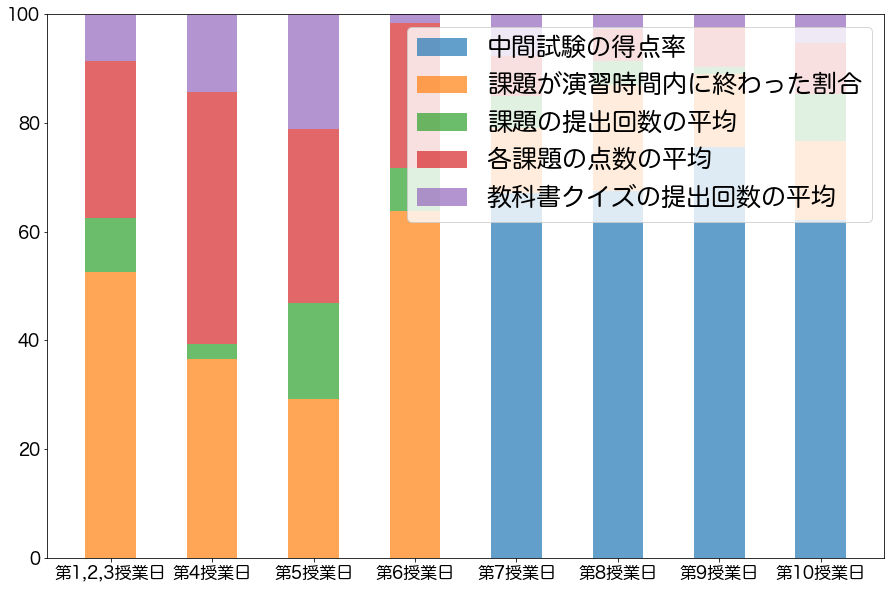

,"第1,2,3授業日",第4授業日,第5授業日,第6授業日,第7授業日,第8授業日,第9授業日,第10授業日
中間試験の得点率,0.0,0.0,0.0,0.0,67.2,67.4,75.6,62.1
課題が演習時間内に終わった割合,52.6,36.5,29.3,63.8,11.9,19.6,13.4,14.5
課題の提出回数の平均,9.9,2.9,17.6,7.9,5.9,4.4,1.2,8.8
各課題の点数の平均,28.9,46.3,31.9,26.7,7.3,5.9,7.5,9.3
教科書クイズの提出回数の平均,8.5,14.2,21.1,1.6,7.7,2.6,2.2,5.3


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
x = ['第1,2,3授業日', '第4授業日', '第5授業日', '第6授業日','第7授業日','第8授業日','第9授業日','第10授業日']
height = [52.6, 36.5, 29.3, 63.8,11.9,19.6,13.4,14.5]
height2 =[9.9, 2.9, 17.6, 7.9,5.9,4.4,1.2,8.8]
height3 = [28.9,46.3,31.9,26.7,7.3,5.9,7.5,9.3]
height4 = [8.5,14.2,21.1,1.6,7.7,2.6,2.2,5.3]
#height5 = [,,,,67.2,67.4,75.6,62.1]

df = pd.DataFrame([
    [0,0,0,0,67.2,67.4,75.6,62.1],[52.6, 36.5, 29.3, 63.8,11.9,19.6,13.4,14.5],
                  [9.9, 2.9, 17.6, 7.9,5.9,4.4,1.2,8.8],
                  [28.9,46.3,31.9,26.7,7.3,5.9,7.5,9.3],
                  [8.5,14.2,21.1,1.6,7.7,2.6,2.2,5.3]],columns=x,index=["中間試験の得点率","課題が演習時間内に終わった割合","課題の提出回数の平均","各課題の点数の平均","教科書クイズの提出回数の平均"])

for i in range(len(df)):
    ax.bar(df.columns,
          df.iloc[i],
          bottom=df.iloc[:i].sum(),
          width=.5,
          alpha=.7)

ax.set_ylim([0,100])
# plt.bar(x, height)
# plt.bar(x, height2,bottom=height)
# plt.bar(x, height3,bottom=[height2,height])
# plt.bar(x, height4,bottom=[height3,height2,height])
# plt.bar(x, height5,bottom=[height4,height3,height2,height])

plt.tick_params(labelsize=17)
ax.legend(df.index, loc="upper right",fontsize=25)

plt.show()
df

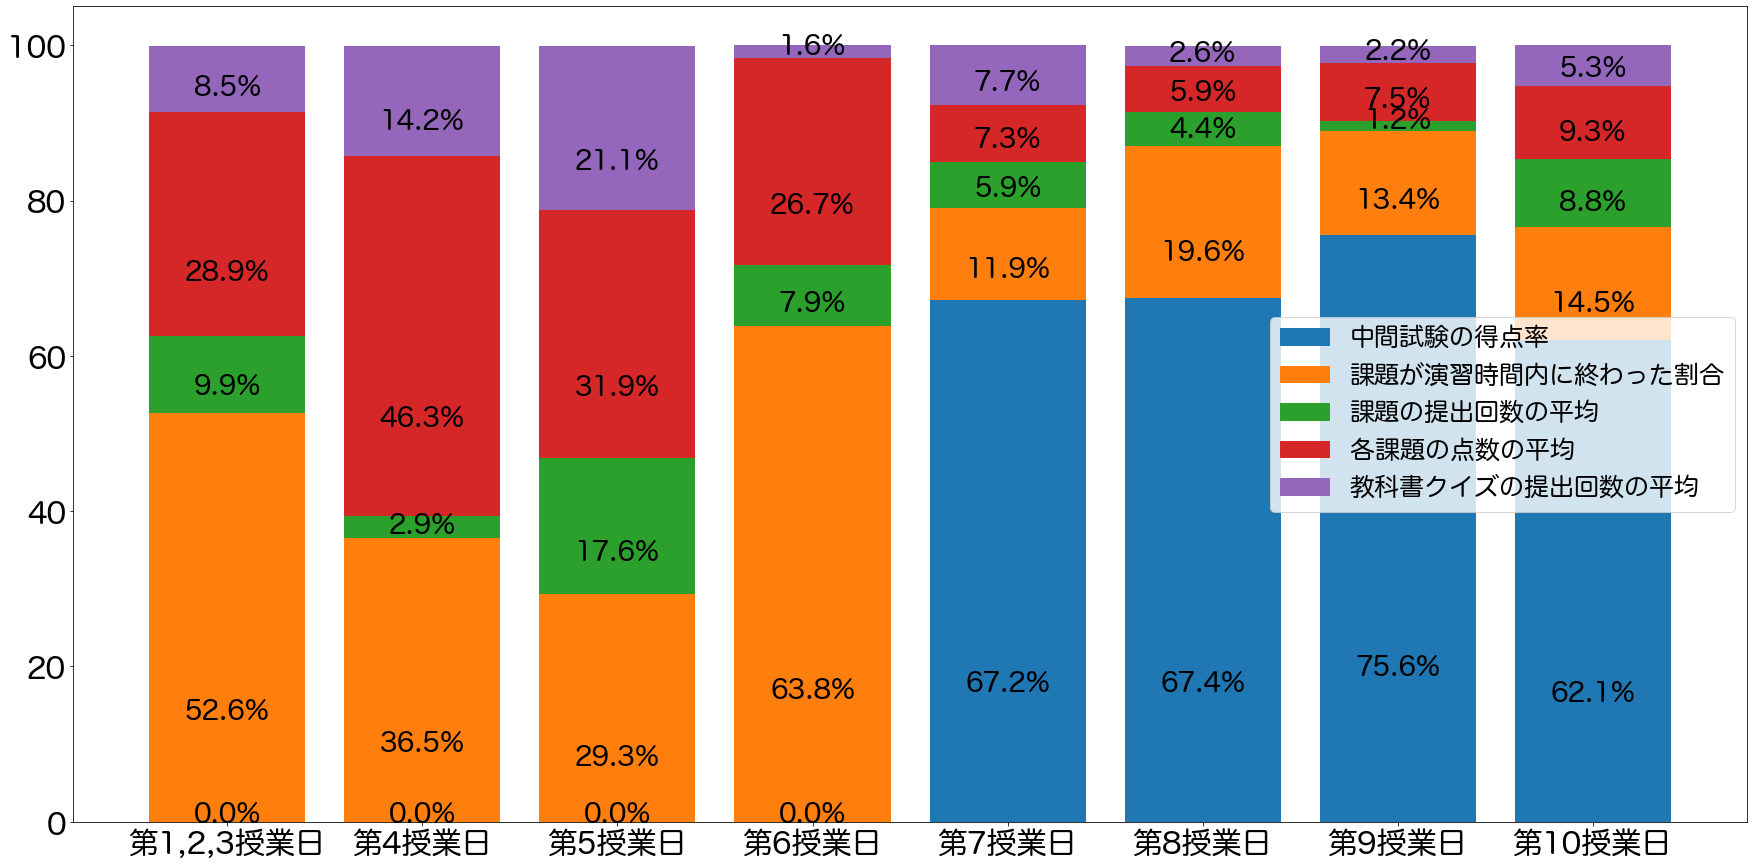

In [152]:
fig, ax = plt.subplots(figsize=(30, 15))
for i in range(len(df)):
    ax.bar(df.columns, 
           df.iloc[i], 
           bottom=df.iloc[:i].sum()
          )
    for j in range(len(df.columns)):
        plt.text(x=j, 
                 y=df.iloc[:i, j].sum()+(df.iloc[i, j]/4), 
                 s=f'{df.iloc[i, j]}%', 
                 ha='center', 
                 va='baseline',size=27
                )
ax.legend(df.index, loc="center right",fontsize=25)
plt.tick_params(labelsize=30)

plt.show()